In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
# Dados fornecidos
bits = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 3072, 4096]
random_forest = [0.2471, 0.2476, 0.2552, 0.2597, 0.2636, 0.2592, 0.2611, 0.2622, 0.2579, 0.2627, 0.2570, 0.2755]
logistic_regression = [0.2471, 0.2476, 0.2553, 0.2673, 0.2953, 0.3448, 0.4065, 0.4550, 0.5073, 0.5491, 0.5697, 0.5775]
decision_tree = [0.2471, 0.2476, 0.2528, 0.2597, 0.2585, 0.2632, 0.2809, 0.2642, 0.2675, 0.2721, 0.2693, 0.2747]
naive_bayes = [0.2471, 0.2476, 0.2476, 0.2597, 0.2476, 0.2494, 0.2486, 0.2499, 0.2475, 0.2500, 0.2469, 0.4693]
one_vs_rest = [0.2471, 0.2476, 0.2524, 0.2597, 0.2673, 0.3423, 0.4026, 0.4532, 0.5056, 0.5496, 0.5712, 0.5788]


In [4]:

# Preparar dados para o violin plot
data = {
    'Bits': bits * 5,
    'Accuracy': random_forest + logistic_regression + decision_tree + naive_bayes + one_vs_rest,
    'Model': ['Random Forest'] * len(bits) + ['Logistic Regression'] * len(bits) + ['Decision Tree'] * len(bits) + ['Naive Bayes'] * len(bits) + ['One-vs-Rest'] * len(bits)
}

df = pd.DataFrame(data)


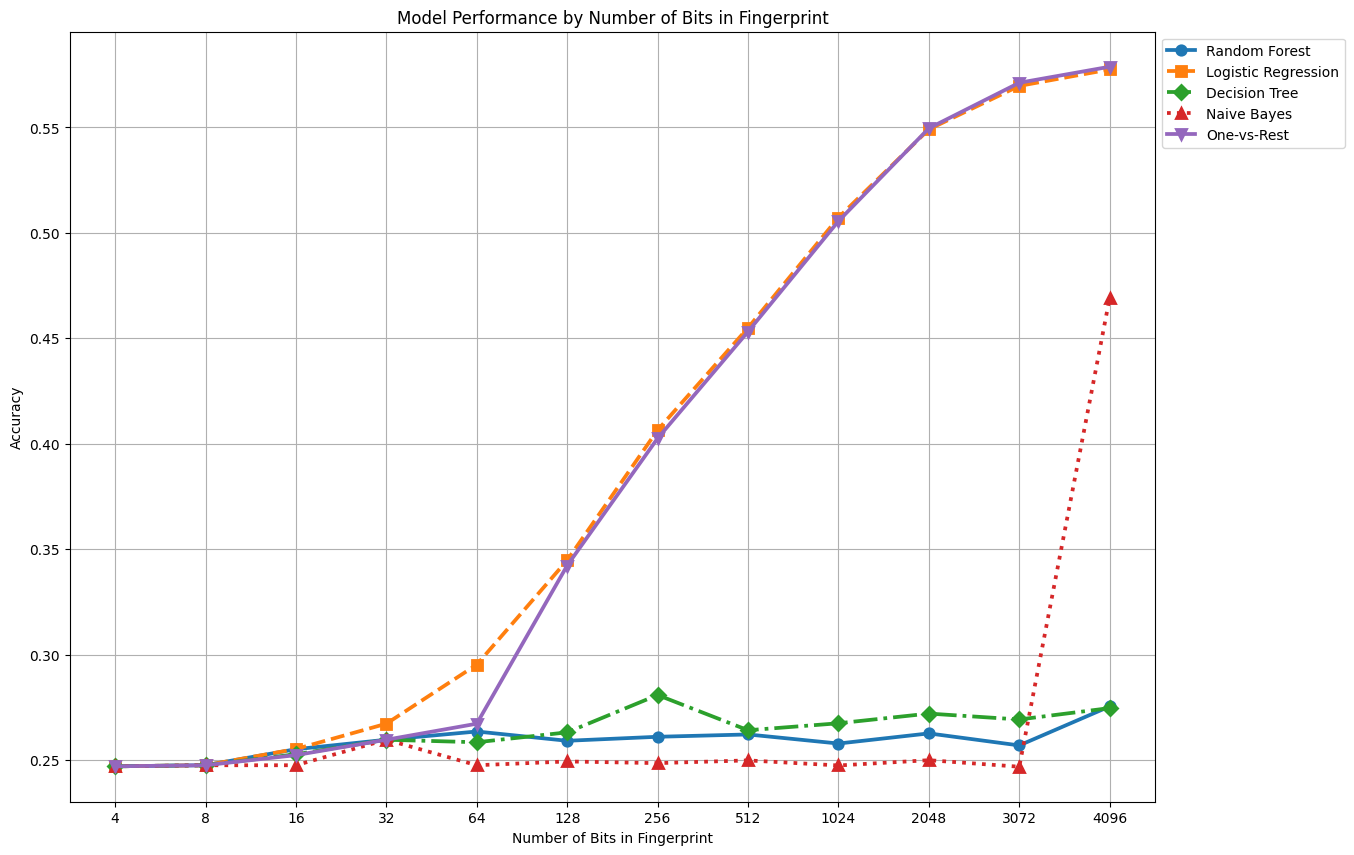

In [10]:
# Point Plot
plt.figure(figsize=(14, 10))
sns.pointplot(x='Bits', y='Accuracy', hue='Model', data=df, markers=['o', 's', 'D', '^', 'v'], linestyles=['-', '--', '-.', ':', '-'])
plt.title('Model Performance by Number of Bits in Fingerprint')
plt.xlabel('Number of Bits in Fingerprint')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [14]:
# Load all confusion matrix data from the CSV files
confusion_matrix_ovr = pd.read_csv('/content/confusion_matrix_one-vs-rest.csv')
confusion_matrix_dt = pd.read_csv('/content/confusion_matrix_decision_tree.csv')
confusion_matrix_lr = pd.read_csv('/content/confusion_matrix_logistic_regression.csv')
confusion_matrix_nb = pd.read_csv('/content/confusion_matrix_naive_bayes.csv')


### Explicação Detalhada:

- **True Positives (TP):** Elementos na diagonal principal, onde a classe prevista coincide com a classe verdadeira.
  
- **False Positives (FP):** Elementos fora da diagonal na mesma coluna. Representam as instâncias que foram previstas como pertencentes a uma determinada classe, mas na verdade pertencem a outra classe. Para uma classe \( i \), os FP são todos os elementos da coluna \( i \), exceto o elemento da diagonal \( (i, i) \).

- **False Negatives (FN):** Elementos fora da diagonal na mesma linha. Representam as instâncias que pertencem a uma determinada classe, mas foram previstas como pertencentes a outra classe. Para uma classe \( i \), os FN são todos os elementos da linha \( i \), exceto o elemento da diagonal \( (i, i) \).

- **True Negatives (TN):** Todos os outros elementos que não estão na linha ou coluna do elemento específico. Para uma classe \( i \), os TN são todos os elementos que não estão na linha \( i \) nem na coluna \( i \).

### Exemplo:

Para a classe 0 (primeira linha e coluna):
- **TP:** \( 13312 \) (posição [0,0])
- **FP:** \( 1652, 1841, 1422, 1871 \) etc. (coluna 0, excluindo posição [0,0])
- **FN:** \( 836, 1283, 618, 965 \) etc. (linha 0, excluindo posição [0,0])
- **TN:** Todos os outros elementos que não estão na linha 0 nem na coluna 0.


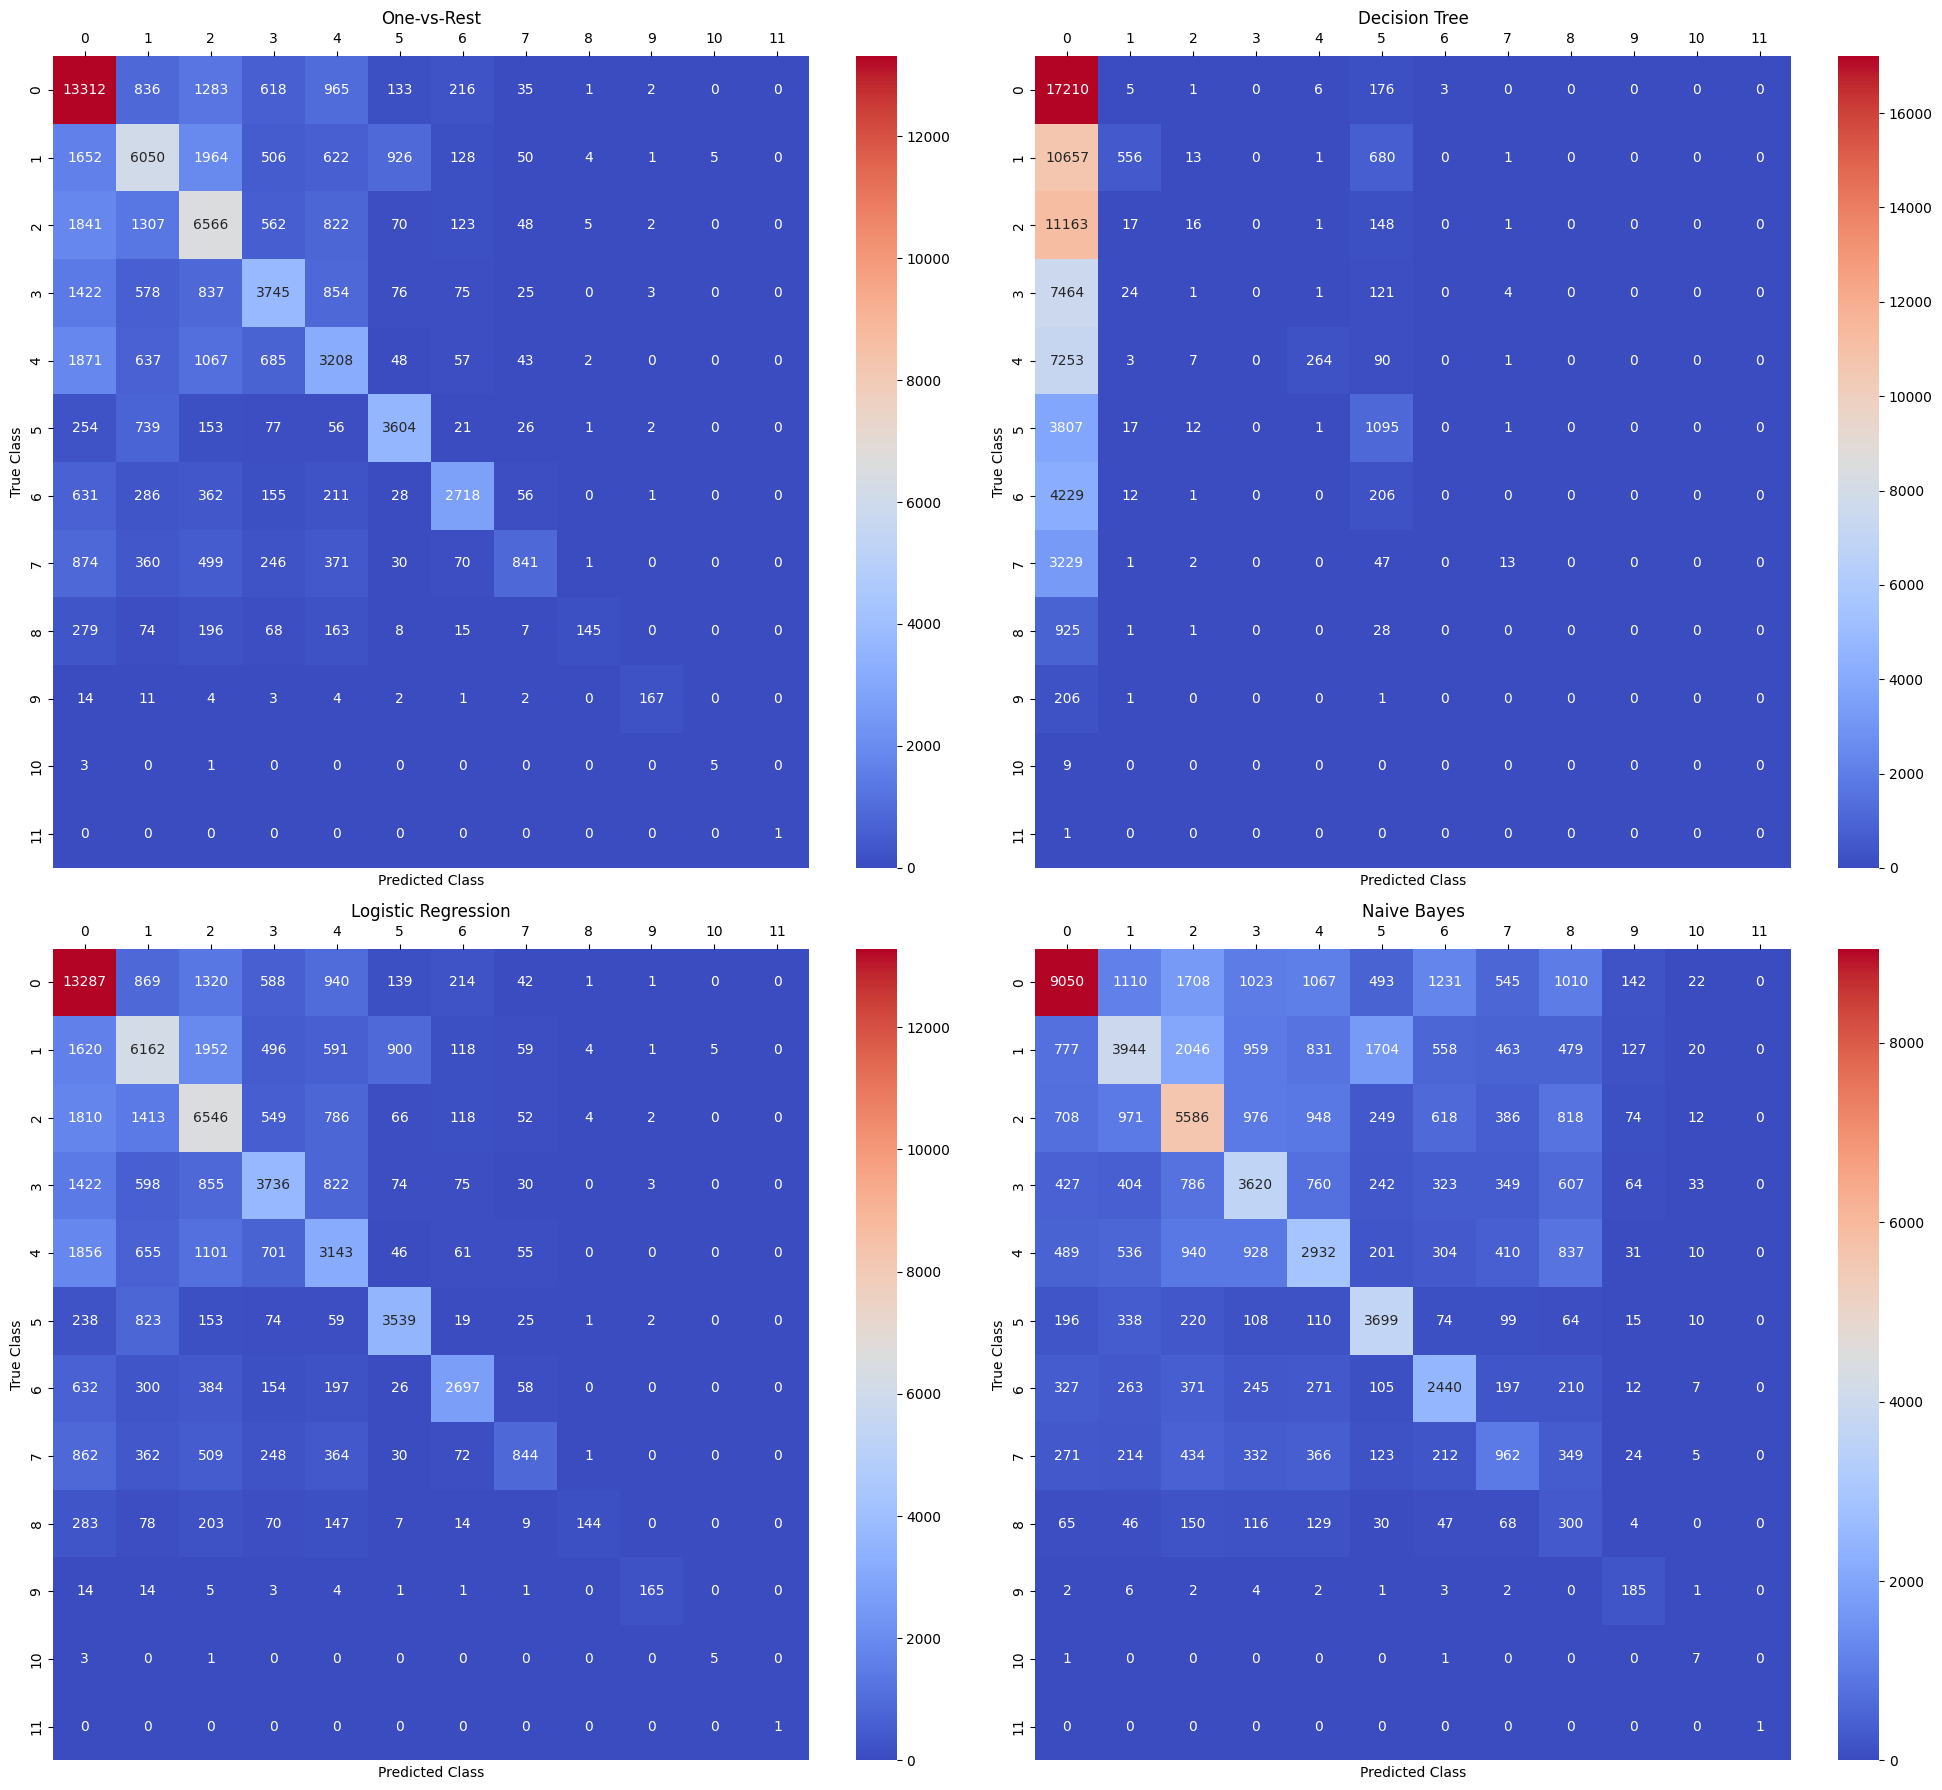

In [18]:
# Set up the figure and axes for plotting multiple confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(20, 18))

# Titles for the subplots
titles = ['One-vs-Rest', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']

# List of confusion matrices
confusion_matrices = [confusion_matrix_ovr, confusion_matrix_dt, confusion_matrix_lr, confusion_matrix_nb]

# Loop through the axes and confusion matrices
for ax, cm, title in zip(axs.flat, confusion_matrices, titles):
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_top()

# Adjust layout
plt.tight_layout()
plt.show()